In [1]:
import iris
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import datetime
import numpy as np
import iris.coords as icoords
import iris.coord_categorisation
import iris.quickplot as qplt 

In [2]:
#defining a new function for time
def make_time(start):
    
    """time = "YYYY-MM" """
    
    time = pd.period_range(start=start , periods=120, freq="M") # 10 years
    time = [datetime.datetime(i.year, i.month, 16) for i in time]
    
    return time
    
time_1257 = make_time("1257-01") # make a time object to plot against

In [3]:
#defining function to merge cube list into single large cube
def merge_cubes(cubes): 
    
    """
    Merge all ensemble members into one cube
    All cubes given the same time coordinate
    """

    big_cube = iris.cube.CubeList()
    time_coord = cubes[0].coord('time')
    n=1
    for cube in cubes:
        ensemble_coord = icoords.AuxCoord(n, standard_name='realization')
        new_cube = cube.copy()
        new_cube.add_aux_coord(ensemble_coord)
        new_cube.remove_coord('time')
        new_cube.add_dim_coord(time_coord,0)
        new_cube.remove_coord('forecast_reference_time')
        big_cube.append(new_cube)
        n+=1
    
    return big_cube.merge_cube()

In [4]:
#setting file path
dir_in_coupled = '/shared/netscratch/lrm49/Laura/'

coupled_cntl = ['u-bu651','u-bv666','u-bv668','u-bv669','u-bv670','u-bv674','u-bv676','u-bv677','u-bv678'] 
coupled_july = ['u-bv020','u-bw758','u-bw761','u-bw762','u-bw763','u-bw764','u-bw765','u-bw766','u-bw767']
coupled_jan = ['u-ca322', 'u-ca323', 'u-ca324', 'u-ca325', 'u-ca326', 'u-ca327', 'u-ca328', 'u-ca330','u-ca331' ]

In [5]:
#Loading in dynamics cubes - surface T extraction 
sat_july = iris.cube.CubeList()
for job_id in coupled_july:

    dynamic_cube = iris.load(dir_in_coupled+'Samalas_July/'+job_id+'_dynamics_vars.nc')
    sst_cube = dynamic_cube.extract('surface_temperature')[0]

    sat_july.append(sst_cube)

In [6]:
#Loading in dynamics cubes - surface T extraction 
sat_jan = iris.cube.CubeList()
for job_id in coupled_jan:

    dynamic_cube = iris.load(dir_in_coupled+'Samalas_Jan/'+job_id+'_dynamics_vars.nc')
    sst_cube = dynamic_cube.extract('surface_temperature')[0]

    sat_jan.append(sst_cube)

In [7]:
#Loading in control cubes - surface T extraction 
all_sst_control = iris.cube.CubeList()
for job_id_2 in coupled_cntl:

    control_cube = iris.load(dir_in_coupled+'Control/'+job_id_2+'_dynamics_vars.nc')
    sst_control = control_cube.extract('surface_temperature')[0]

    all_sst_control.append(sst_control)

In [8]:
#merging list of cubes into single large cube
one_big_july= merge_cubes(sat_july)
one_big_jan= merge_cubes(sat_jan)
one_big_control = merge_cubes(all_sst_control)

In [9]:
mean_control = one_big_control.collapsed('realization',iris.analysis.MEAN)

/home/lw602/.conda/envs/py27iris/lib/python2.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'realization'.
  warnings.warn(msg.format(self.name()))


In [10]:
anomally_july = one_big_july - mean_control.data
anomally_jan = one_big_jan - mean_control.data

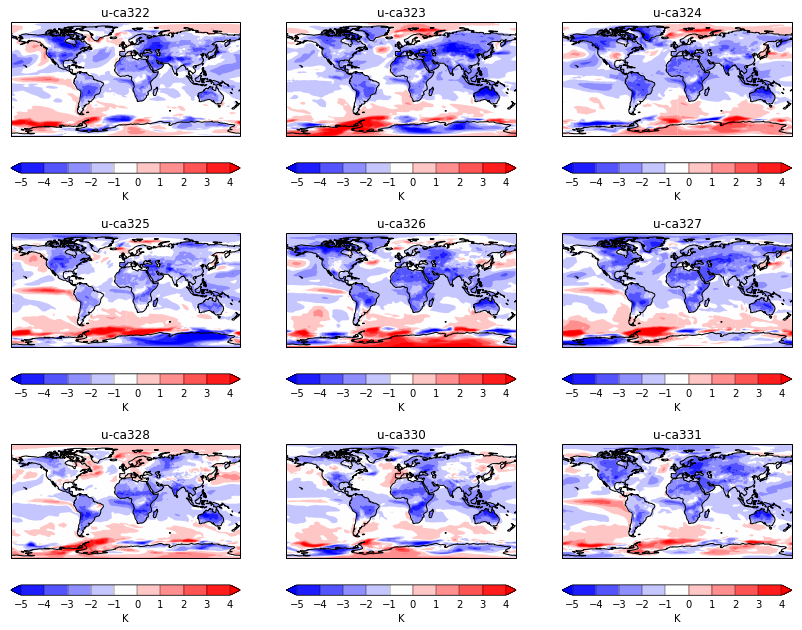

In [11]:
i = 1
levels=np.arange(-5,5,1)
plt.figure(figsize=(14,11))

labels = ['u-ca322', 'u-ca323', 'u-ca324', 'u-ca325', 'u-ca326', 'u-ca327', 'u-ca328', 'u-ca330', 'u-ca331']


for cube in anomally_jan.slices_over('realization'): # loop through ensemble members
    
    
    summer_2 = cube[4:8].collapsed('time',iris.analysis.MEAN)#For a Jan 58 eruption, summer 58 is [4:8]
    
    plt.subplot(3,3,i) 
    qplt.contourf(summer_2, levels = levels, cmap='bwr', extend='both') 
    plt.gca().coastlines() # add coastlines to the plot
    plt.title(str(labels[i-1]))
    
    i = i+1
    
plt.savefig('1258_Summer_SAT_Jan.pdf')

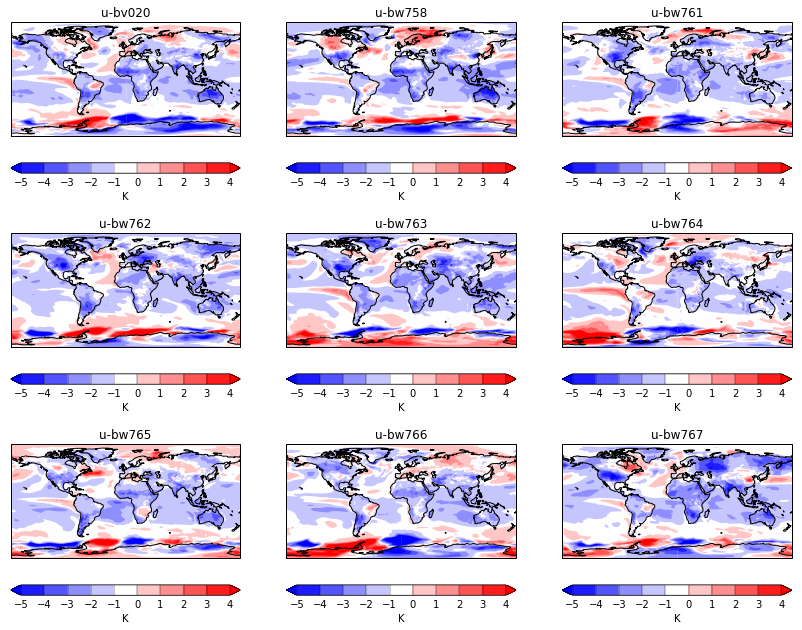

In [12]:
i = 1
levels=np.arange(-5,5,1)
plt.figure(figsize=(14,11))

labels = ['u-bv020', 'u-bw758', 'u-bw761', 'u-bw762', 'u-bw763', 'u-bw764', 'u-bw765', 'u-bw766', 'u-bw767']


for cube in anomally_july.slices_over('realization'): # loop through ensemble members
    
    
    summer_2 = cube[16:20].collapsed('time',iris.analysis.MEAN)#For a July 57 eruption, summer 58 is [16:20]
    
    plt.subplot(3,3,i) 
    qplt.contourf(summer_2, levels = levels, cmap='bwr', extend='both') 
    plt.gca().coastlines() # add coastlines to the plot
    plt.title(str(labels[i-1]))
    
    i = i+1

plt.savefig('1258_Summer_SAT_July.pdf')
    